In [3]:
from google.colab import files

# Upload an image file
uploaded = files.upload()


Saving man.png to man (2).png


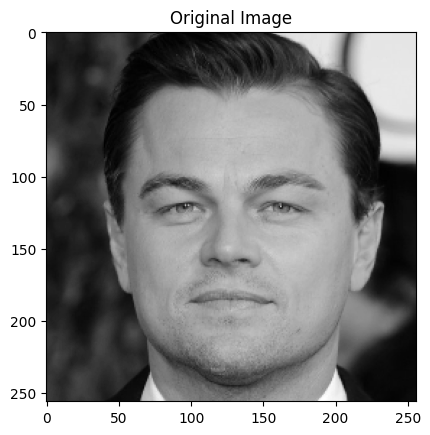

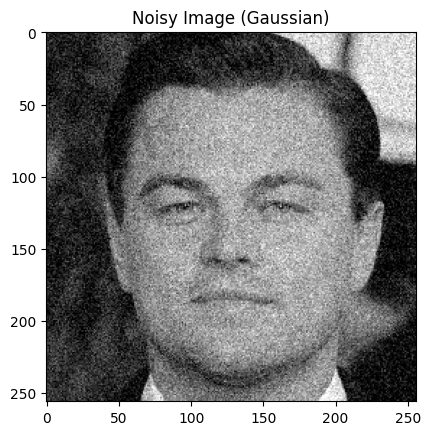

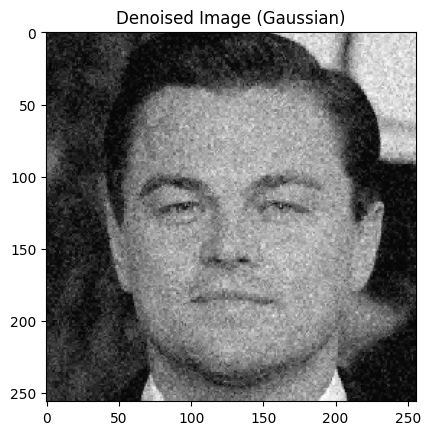

<ipython-input-6-3cdb5536a4ce>:46: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, denoised)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


PSNR: 22.79 dB
SSIM: 0.4324


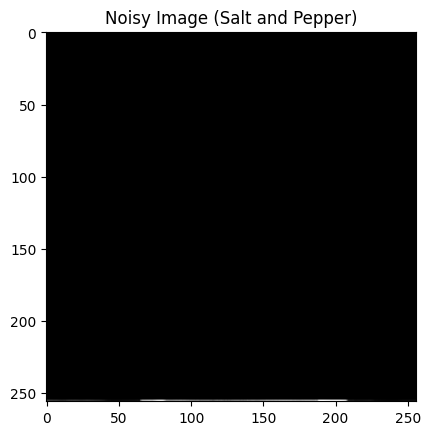

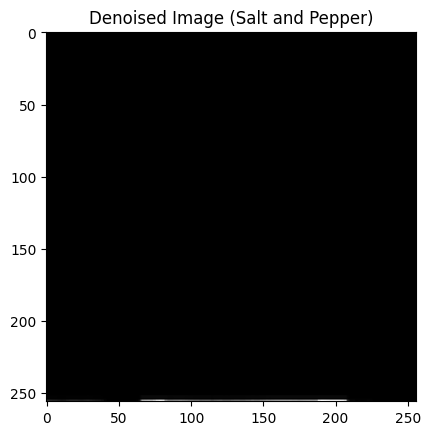

PSNR: 6.43 dB
SSIM: 0.0058


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Function to add Salt and Pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy = np.copy(image)

    # Add salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords] = 255

    # Add pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords] = 0

    return noisy.astype(np.uint8)

# Function to perform image denoising using DWT
def denoise_image(image):
    # Discrete Wavelet Transform (DWT)
    coeffs = pywt.dwt2(image, 'bior1.3')

    # Thresholding
    threshold = 20
    coeffs = tuple(pywt.threshold(c, threshold, mode='soft') for c in coeffs)

    # Inverse DWT
    denoised_image = pywt.idwt2(coeffs, 'bior1.3')

    return denoised_image

# Function to compute PSNR and SSIM
def evaluate_quality(original, noisy, denoised):
    psnr = peak_signal_noise_ratio(original, denoised)
    ssim = structural_similarity(original, denoised)
    print(f"PSNR: {psnr:.2f} dB")
    print(f"SSIM: {ssim:.4f}")


image_path = "man.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display original image
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Add Gaussian noise
noisy_image_gaussian = add_gaussian_noise(original_image)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.title('Noisy Image (Gaussian)')
plt.show()

# Denoise the image
denoised_image_gaussian = denoise_image(noisy_image_gaussian)

# Display denoised image
plt.imshow(denoised_image_gaussian, cmap='gray')
plt.title('Denoised Image (Gaussian)')
plt.show()

# Evaluate PSNR and SSIM
evaluate_quality(original_image, noisy_image_gaussian, denoised_image_gaussian)

# Add Salt and Pepper noise
noisy_image_sp = add_salt_and_pepper_noise(original_image)
plt.imshow(noisy_image_sp, cmap='gray')
plt.title('Noisy Image (Salt and Pepper)')
plt.show()

# Denoise the image
denoised_image_sp = denoise_image(noisy_image_sp)

# Display denoised image
plt.imshow(denoised_image_sp, cmap='gray')
plt.title('Denoised Image (Salt and Pepper)')
plt.show()

# Evaluate PSNR and SSIM
evaluate_quality(original_image, noisy_image_sp, denoised_image_sp)
